1. Exercise: Time series
2. Your name: Dima Mikhaylov
3. UVA ID: agp7dp

## Correlation between time series
In Pandas, the DataFrame.corr() method is used to calculate the correlation between two time series.
 
- Is there a negative correlation between temperature and humidity?
- Calculate the correlation between temperature and humidity for each month.

In [61]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
# Import and inspect dataset
df = pd.read_csv('weather.csv', index_col=0)
df.head()

,Date Time,p (mbar),T (degC),rho (g/m**3)
0,01.01.2009 00:10:00,996.52,-8.02,1307.75
1,01.01.2009 00:20:00,996.57,-8.41,1309.80
2,01.01.2009 00:30:00,996.53,-8.51,1310.24
3,01.01.2009 00:40:00,996.51,-8.31,1309.19
4,01.01.2009 00:50:00,996.51,-8.27,1309.00


In [52]:
# Convert 'Date Time' column to the datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),rho (g/m**3)
0,2009-01-01 00:10:00,996.52,-8.02,1307.75
1,2009-01-01 00:20:00,996.57,-8.41,1309.80
2,2009-01-01 00:30:00,996.53,-8.51,1310.24
3,2009-01-01 00:40:00,996.51,-8.31,1309.19
4,2009-01-01 00:50:00,996.51,-8.27,1309.00


In [73]:
# Set Date Time as an index in the new copy DataFrame
df.set_index('Date Time', inplace=True)
df.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
2009-01-01 00:10:00,996.52,-8.02,1307.75
2009-01-01 00:20:00,996.57,-8.41,1309.80
2009-01-01 00:30:00,996.53,-8.51,1310.24
2009-01-01 00:40:00,996.51,-8.31,1309.19
2009-01-01 00:50:00,996.51,-8.27,1309.00


In [74]:
df.loc[datetime(2010, 1, 1)]

p (mbar)         967.36
T (degC)          -2.84
rho (g/m**3)    1244.34
Name: 2010-01-01 00:00:00, dtype: float64

In [78]:
# Strong negative correlation between temperature and humidity:
temp = 'T (degC)'
humid = 'rho (g/m**3)'
df[[temp, humid]].corr()

,T (degC),rho (g/m**3)
T (degC),1.00000,-0.96341
rho (g/m**3),-0.96341,1.00000


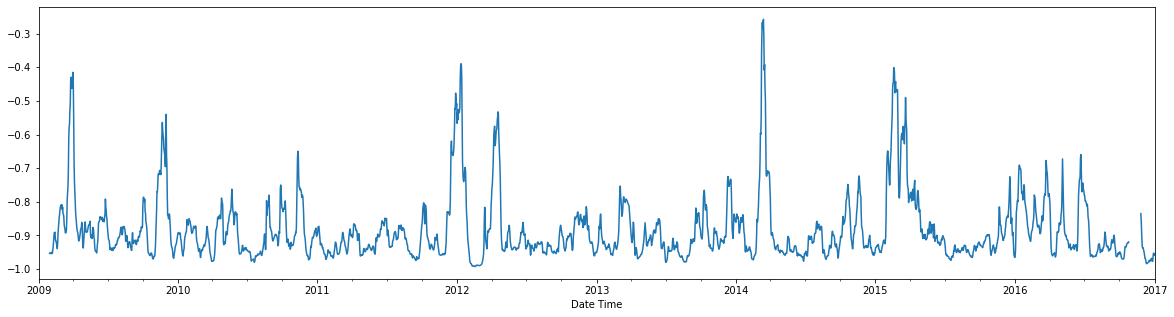

In [90]:
# Compute monthly (30D rolling) correlations between temperature and humidity, downsampled to a 1-day scale
df[temp].resample('1D').mean().rolling(30).corr(df[humid].resample('1D').mean()).plot(figsize=(20, 5))
plt.show()